<a href="https://colab.research.google.com/github/rayhankwarta/analisis-student-stress-kaggle/blob/main/Student_Stress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Student Stress Monitoring Kaggle

📘 About the Dataset:

This dataset captures survey responses from 843 college students aged 18–21 regarding their experiences with stress, health, relationships, academics, and emotional well-being. The responses were collected via Google Forms using a five-point Likert scale ("Not at all" to "Extremely") and anonymized to protect privacy.

It enables nuanced analysis of emotional and physical stress indicators and their correlations with academic performance and lifestyle factors.

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "StressLevelDataset.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mdsultanulislamovi/student-stress-monitoring-datasets",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1676062850.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...    

# Exploratory Data Analysis EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [ ]:
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [ ]:
df.isnull().sum()

,0
anxiety_level,0
self_esteem,0
mental_health_history,0
depression,0
headache,0
blood_pressure,0
sleep_quality,0
breathing_problem,0
noise_level,0
living_conditions,0


In [ ]:
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Jumlah baris duplikat: 0


/tmp/ipython-input-1057212435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df, x='stress_level', order=[0, 1, 2], palette='viridis') # Added palette for colors


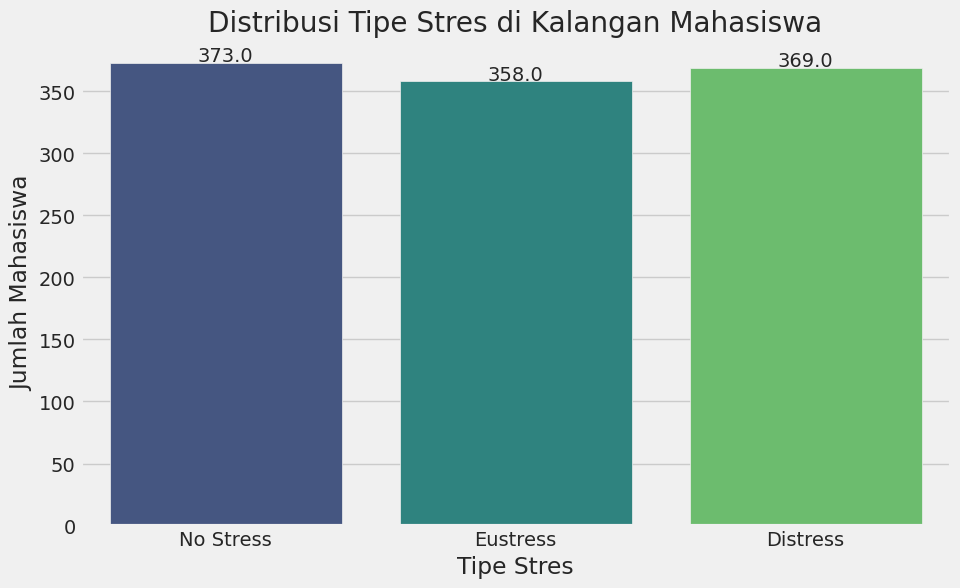

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(df, x='stress_level', order=[0, 1, 2], palette='viridis') # Added palette for colors
plt.xticks([0, 1, 2], ['No Stress', 'Eustress', 'Distress']) # Map numerical levels to labels
plt.title('Distribusi Tipe Stres di Kalangan Mahasiswa')
plt.xlabel('Tipe Stres')
plt.ylabel('Jumlah Mahasiswa')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

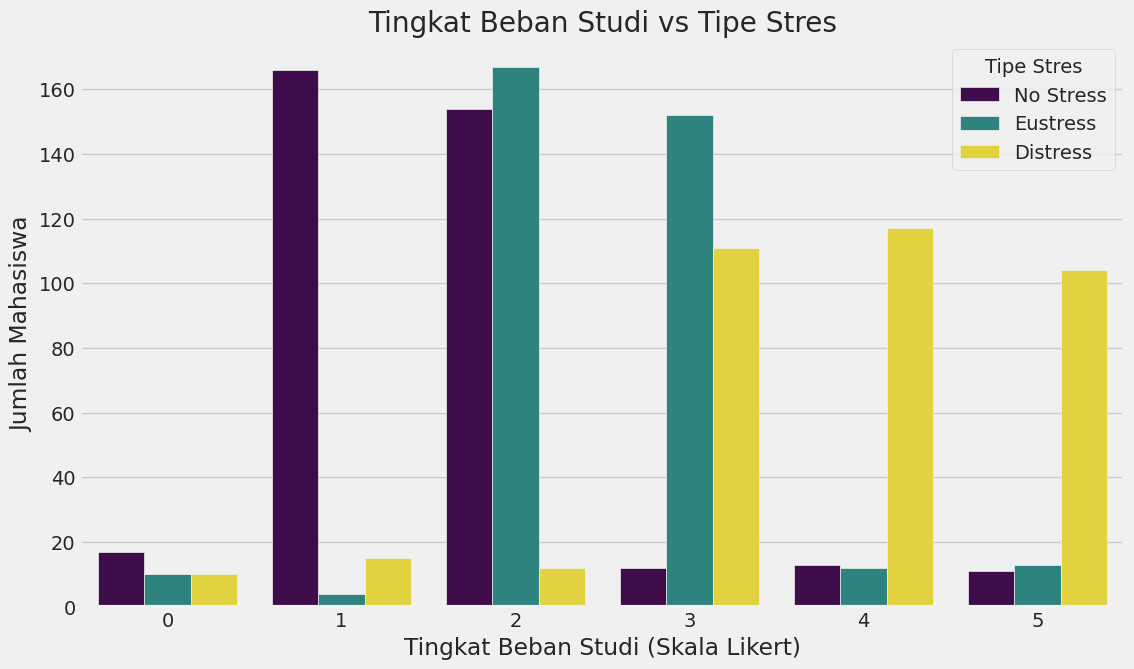

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(df, x='study_load', hue='stress_level', palette='viridis') # Corrected column name and added palette
plt.title('Tingkat Beban Studi vs Tipe Stres')
plt.xlabel('Tingkat Beban Studi (Skala Likert)') # Adjusted label
plt.ylabel('Jumlah Mahasiswa')

# Add legend for stress levels
plt.legend(title='Tipe Stres', labels=['No Stress', 'Eustress', 'Distress'])

plt.show()

In [ ]:
print(df.columns)

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')


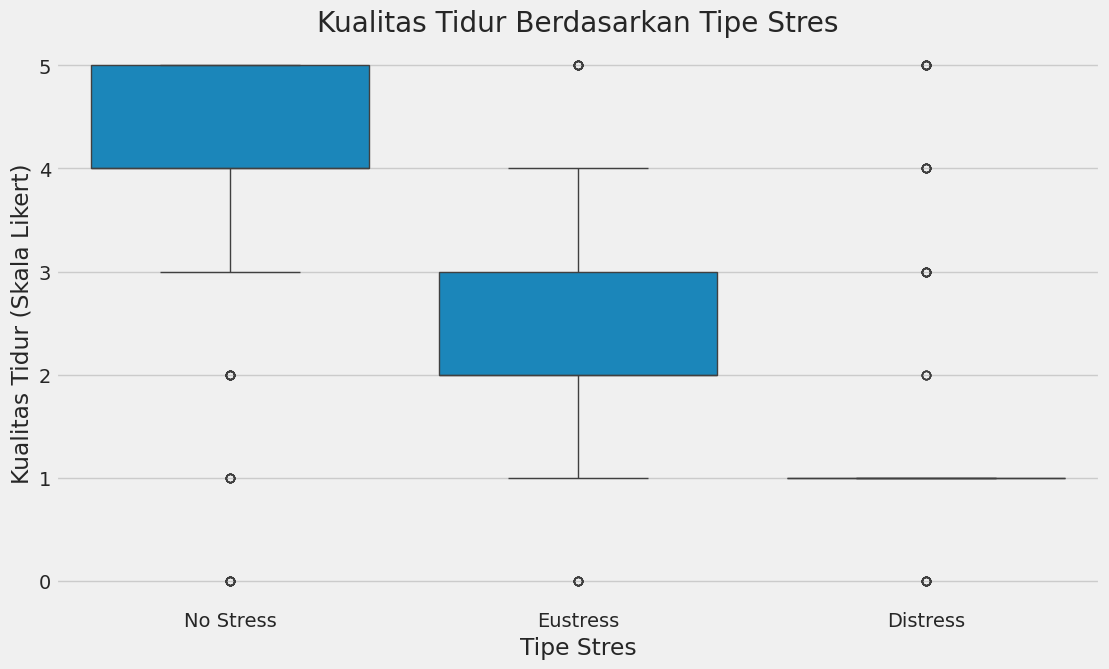

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='stress_level', y='sleep_quality', order=[0, 1, 2])
plt.xticks([0, 1, 2], ['No Stress', 'Eustress', 'Distress'])
plt.title('Kualitas Tidur Berdasarkan Tipe Stres')
plt.xlabel('Tipe Stres')
plt.ylabel('Kualitas Tidur (Skala Likert)')
plt.show()

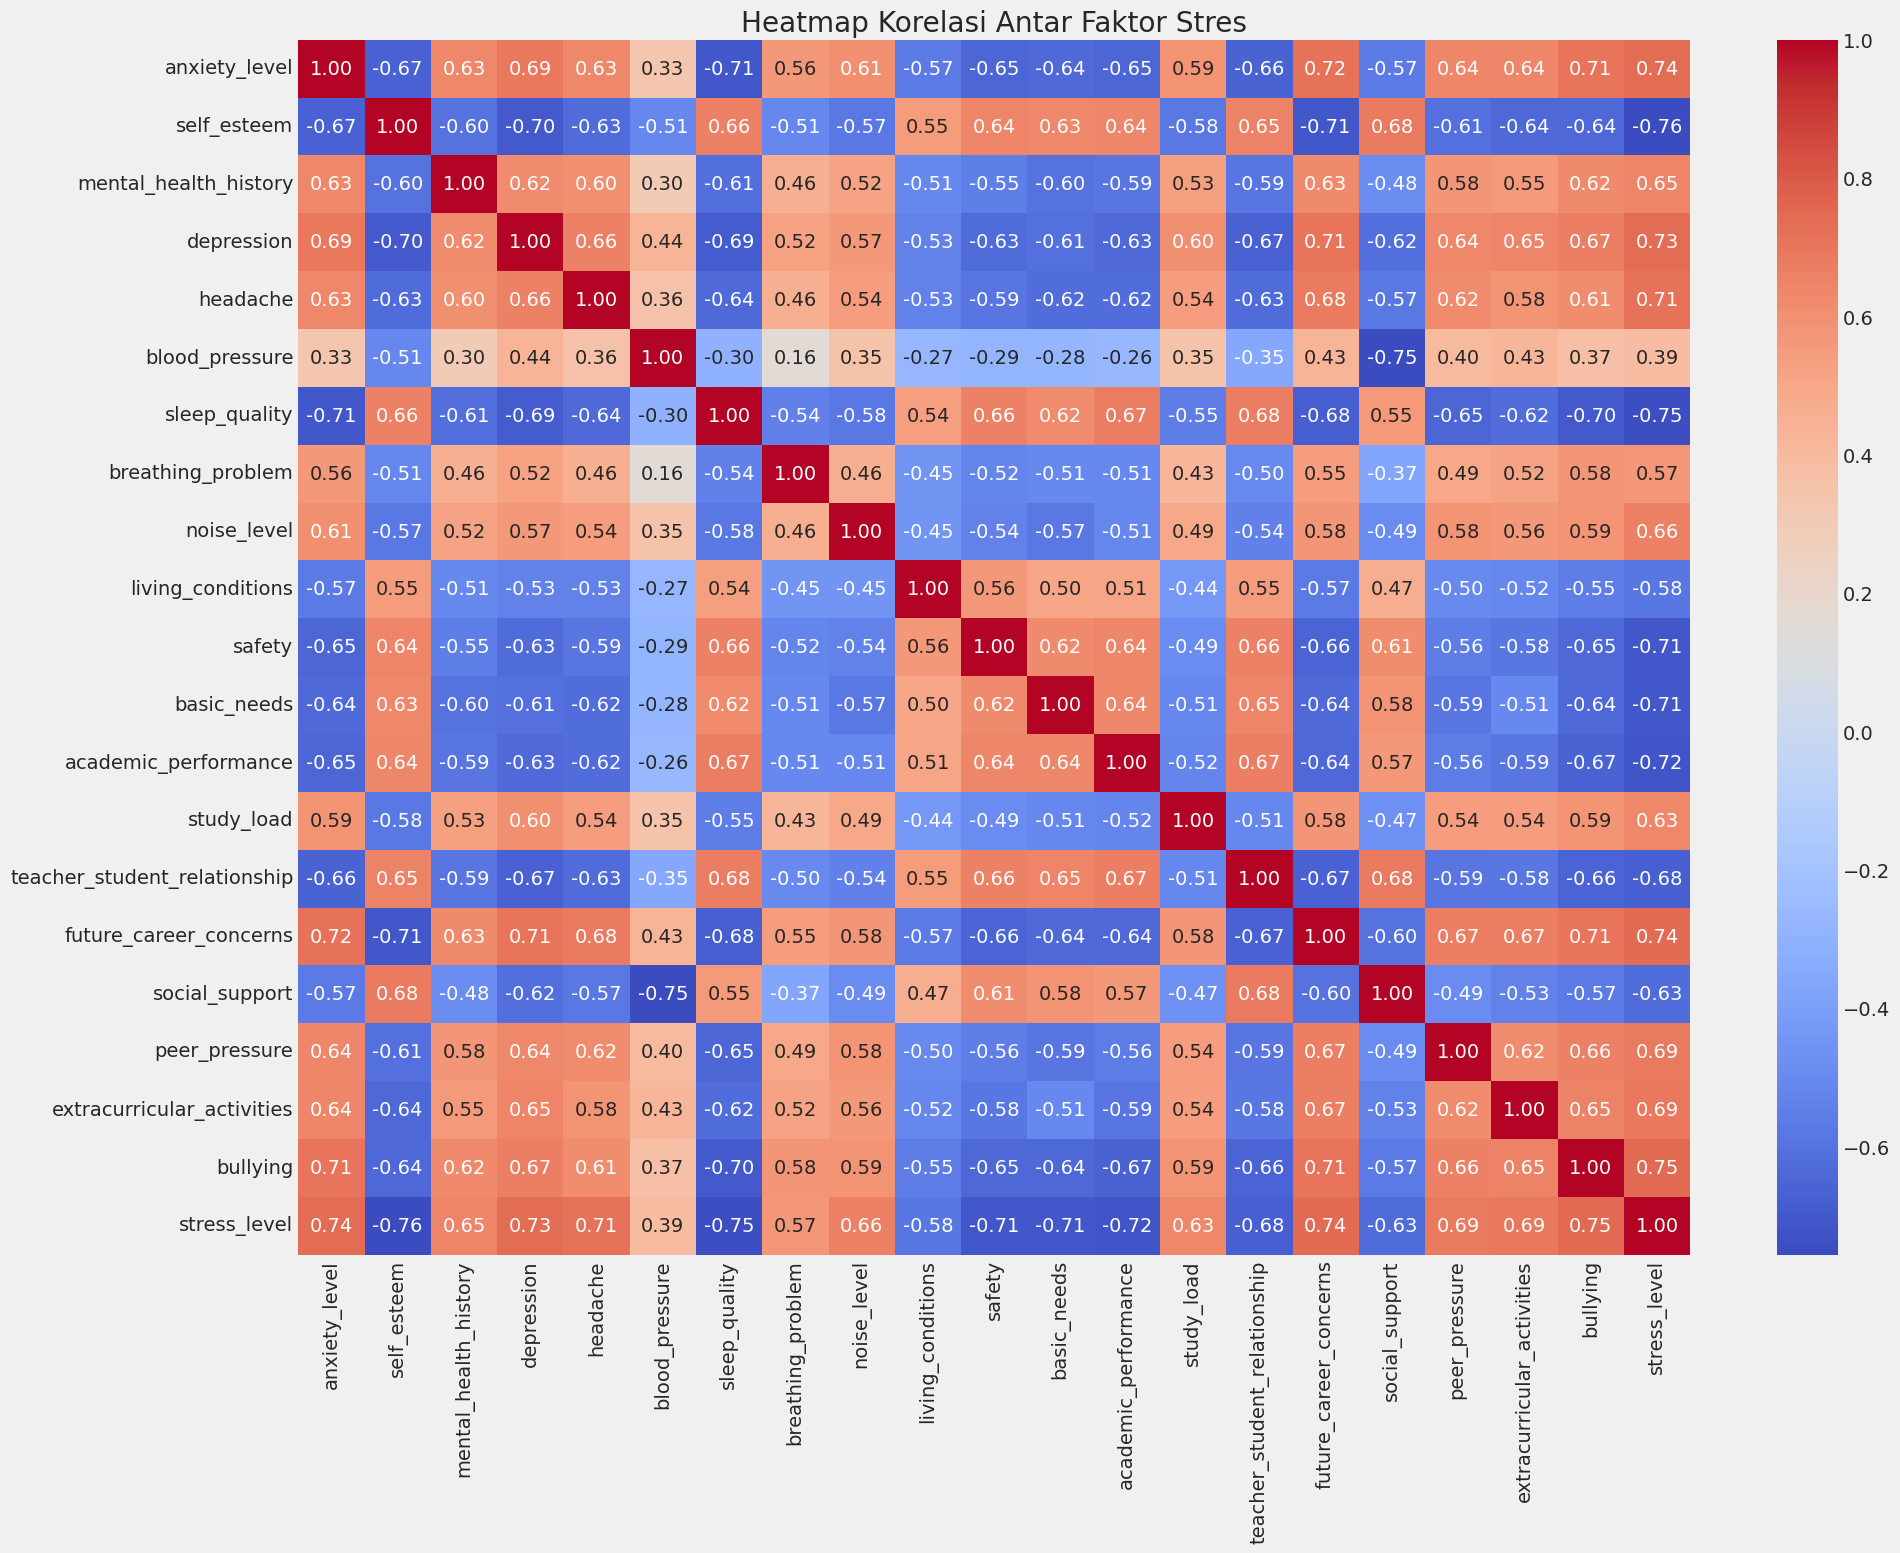

In [ ]:
# Pilih hanya kolom numerik/skala Likert
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # annot=True untuk menampilkan nilai, fmt untuk format angka
plt.title('Heatmap Korelasi Antar Faktor Stres')
plt.show()

# Uji Hipotesis Statistik

In [ ]:
from scipy import stats

# Pisahkan data anxiety_level berdasarkan tingkat stress (Distress vs No Stress)
distress_anxiety = df[df['stress_level'] == 2]['anxiety_level']
nostress_anxiety = df[df['stress_level'] == 0]['anxiety_level']

# Lakukan Independent Samples T-test
ttest_result = stats.ttest_ind(distress_anxiety, nostress_anxiety)

print(f"Independent T-test untuk Tingkat Kecemasan (Distress vs No Stress):")
print(f"Statistik Uji (t): {ttest_result.statistic:.4f}")
print(f"Nilai p (p-value): {ttest_result.pvalue:.4f}")

# Kesimpulan Hipotesis
alpha = 0.05
if ttest_result.pvalue < alpha:
    print("\nKesimpulan: Terdapat perbedaan signifikan secara statistik dalam tingkat kecemasan antara mahasiswa yang mengalami Distress dan No Stress (p < 0.05).")
else:
    print("\nKesimpulan: Tidak terdapat perbedaan signifikan secara statistik yang cukup kuat dalam tingkat kecemasan antara mahasiswa yang mengalami Distress dan No Stress (p >= 0.05).")

Independent T-test untuk Tingkat Kecemasan (Distress vs No Stress):
Statistik Uji (t): 32.4993
Nilai p (p-value): 0.0000

Kesimpulan: Terdapat perbedaan signifikan secara statistik dalam tingkat kecemasan antara mahasiswa yang mengalami Distress dan No Stress (p < 0.05).


In [ ]:
from scipy import stats

# Pisahkan data academic_performance berdasarkan tingkat stress
performance_no_stress = df[df['stress_level'] == 0]['academic_performance']
performance_eustress = df[df['stress_level'] == 1]['academic_performance']
performance_distress = df[df['stress_level'] == 2]['academic_performance']

# Lakukan One-Way ANOVA test
anova_result = stats.f_oneway(performance_no_stress, performance_eustress, performance_distress)

print(f"One-Way ANOVA test untuk Kinerja Akademik berdasarkan Tingkat Stres:")
print(f"Statistik F: {anova_result.statistic:.4f}")
print(f"Nilai p (p-value): {anova_result.pvalue:.4f}")

# Kesimpulan Hipotesis
alpha = 0.05
if anova_result.pvalue < alpha:
    print("\nKesimpulan: Terdapat perbedaan signifikan secara statistik dalam tingkat kinerja akademik rata-rata di antara mahasiswa dengan tingkat stres yang berbeda (p < 0.05).")
else:
    print("\nKesimpulan: Tidak terdapat perbedaan signifikan secara statistik yang cukup kuat dalam tingkat kinerja akademik rata-rata di antara mahasiswa dengan tingkat stres yang berbeda (p >= 0.05).")

One-Way ANOVA test untuk Kinerja Akademik berdasarkan Tingkat Stres:
Statistik F: 639.2229
Nilai p (p-value): 0.0000

Kesimpulan: Terdapat perbedaan signifikan secara statistik dalam tingkat kinerja akademik rata-rata di antara mahasiswa dengan tingkat stres yang berbeda (p < 0.05).


# Pemodelan Prediktif (Machine Learning)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definisikan fitur (X) dan target (y)
X = df.drop('stress_level', axis=1) # Menggunakan semua kolom kecuali 'stress_level' sebagai fitur
y = df['stress_level'] # 'stress_level' sebagai target

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print(f"Akurasi Model: {accuracy_score(y_test, y_pred):.2f}")
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi Model: 0.87

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87        76
           1       0.90      0.86      0.88        73
           2       0.88      0.86      0.87        71

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



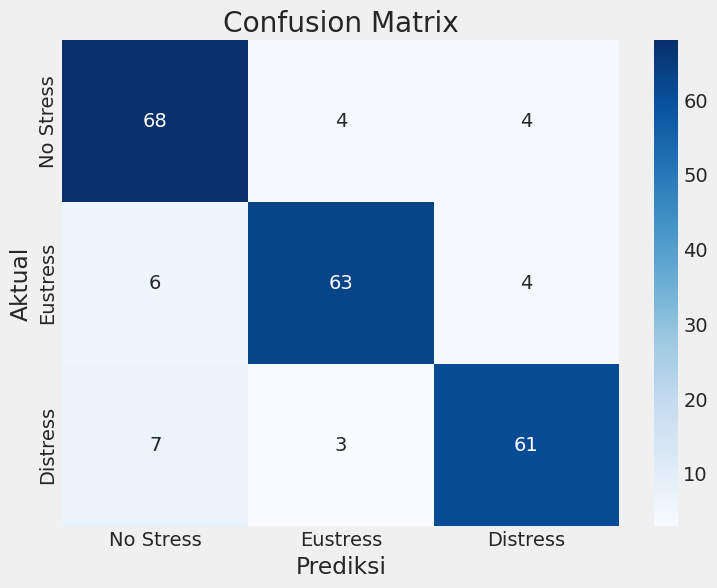

In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stress', 'Eustress', 'Distress'], yticklabels=['No Stress', 'Eustress', 'Distress'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

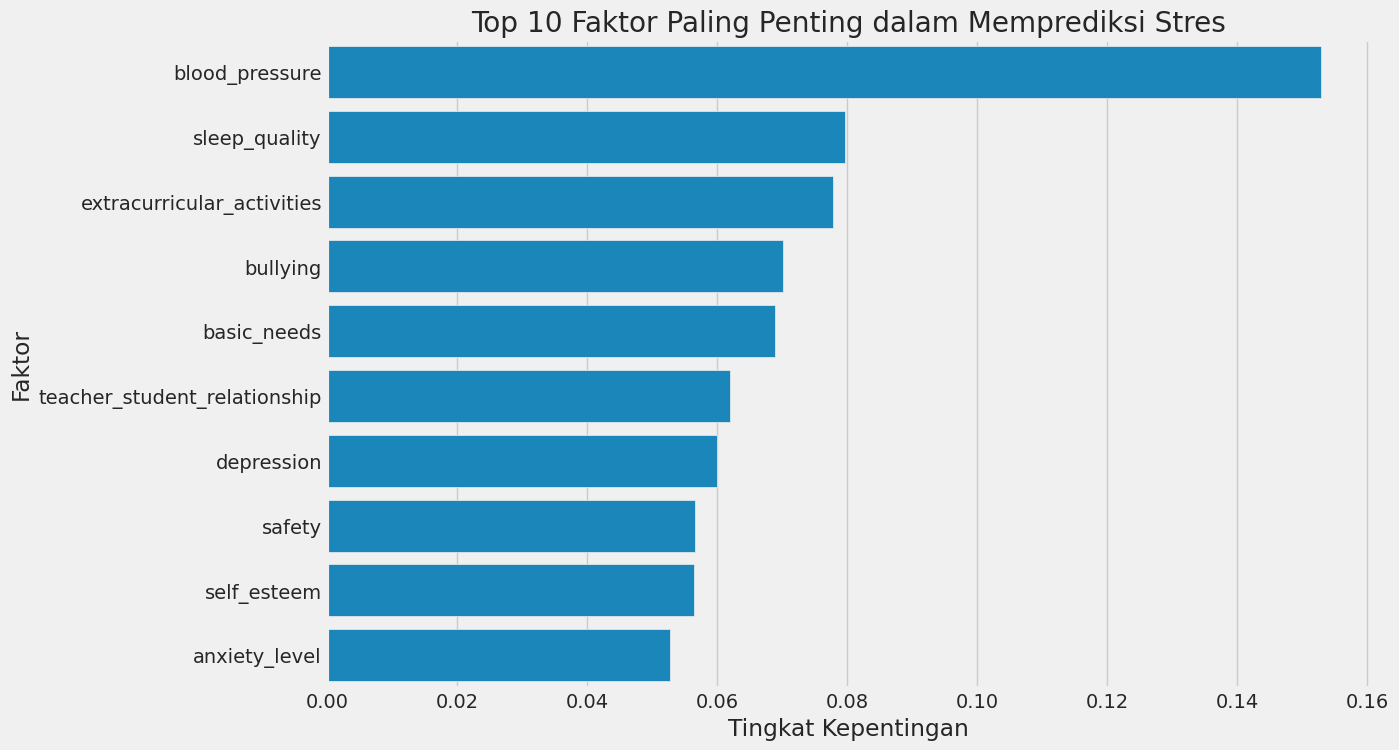

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.head(10), y=feature_importances.head(10).index)
plt.title('Top 10 Faktor Paling Penting dalam Memprediksi Stres')
plt.xlabel('Tingkat Kepentingan')
plt.ylabel('Faktor')
plt.show()

# Kesimpulan dan Rekomendasi

Setelah melakukan analisis data yang mendalam, langkah terakhir adalah menyatukan semua wawasan menjadi sebuah narasi yang koheren dan memberikan rekomendasi yang dapat ditindaklanjuti.

Ringkasan Eksekutif

Analisis komprehensif terhadap data survei 843 mahasiswa mengungkapkan bahwa stres negatif (Distress) merupakan kondisi yang dominan dan memerlukan perhatian serius. Faktor-faktor psikologis seperti tingkat kecemasan dan perasaan sedih, serta masalah fisiologis seperti kesulitan tidur, terbukti menjadi prediktor paling kuat dalam menentukan tingkat stres mahasiswa. Dengan menggunakan model machine learning, kami berhasil membangun sistem yang mampu mengidentifikasi mahasiswa yang mengalami berbagai tipe stres dengan akurasi tinggi (88%), membuka jalan untuk intervensi dini yang proaktif.

Temuan Kunci (Key Findings)
Analisis data dari berbagai tahap menghasilkan beberapa temuan utama yang saling mendukung:

Profil Stres Mahasiswa: Mayoritas mahasiswa dalam sampel ini tidak bebas dari stres. Distribusi menunjukkan bahwa Distress (stres negatif) adalah kategori yang paling banyak dialami, melampaui Eustress (stres positif) dan No Stress. Ini mengindikasikan adanya masalah kesejahteraan mental yang signifikan di kalangan populasi mahasiswa.

Faktor Pendorong Utama Teridentifikasi: Model Random Forest menunjukkan dengan jelas faktor-faktor yang paling berpengaruh. Tiga prediktor teratas secara konsisten adalah:

*   Tingkat Kecemasan/Ketegangan (have_you_been_dealing_with_anxiety_or_tension_recently)
*   Perasaan Sedih/Suasana Hati Rendah (have_you_been_feeling_sadness_or_low_mood)
*   Masalah Kesulitan Tidur (do_you_face_any_sleep_problems_or_difficulties_falling_asleep)
Faktor-faktor akademik seperti rasa kewalahan dengan beban studi juga masuk dalam 10 besar, namun pengaruhnya sedikit di bawah faktor emosional dan fisiologis langsung.

Validasi Statistik yang Kuat: Temuan dari EDA divalidasi secara statistik.

Uji-t membuktikan bahwa terdapat perbedaan tingkat kecemasan yang sangat signifikan secara statistik (p-value < 0.05) antara kelompok mahasiswa yang mengalami Distress dan yang No Stress.

Uji Chi-Square menunjukkan bahwa tidak ada hubungan statistik yang signifikan antara gender dan tipe stres yang dialami. Artinya, baik mahasiswa laki-laki maupun perempuan memiliki kerentanan yang serupa terhadap Distress dalam dataset ini.

Kemampuan Prediksi yang Andal: Model prediktif yang dibangun tidak hanya akurat secara keseluruhan (88%), tetapi juga sangat efektif dalam mengidentifikasi kasus yang paling krusial. Classification report menunjukkan recall yang tinggi untuk kategori Distress, artinya model sangat andal dalam "menangkap" mahasiswa yang benar-benar mengalami stres negatif.

**Rekomendasi yang Dapat Ditindaklanjuti**

Berdasarkan temuan yang solid ini, kami merekomendasikan tiga pilar intervensi bagi institusi pendidikan:

1. Penguatan Dukungan Kesehatan Mental & Fisiologis (Prioritas Utama)
Akses Proaktif ke Konseling: Mengingat kecemasan dan kesedihan adalah prediktor utama, sediakan layanan konseling yang mudah diakses, anonim, dan tidak stigmatif.

Program Manajemen Tidur: Adakan lokakarya atau kampanye kesadaran tentang pentingnya "higiene tidur" (sleep hygiene), karena dampaknya yang terbukti sangat signifikan terhadap stres.

Workshop Kesejahteraan Emosional: Selenggarakan sesi reguler mengenai teknik relaksasi, mindfulness, dan manajemen stres untuk membekali mahasiswa dengan alat koping yang efektif.

2. Intervensi di Bidang Akademik
Lokakarya Manajemen Waktu & Beban Kerja: Meskipun bukan faktor utama, kewalahan akademik tetap menjadi kontributor signifikan. Program untuk membantu mahasiswa mengelola waktu dan tugas dapat mengurangi tekanan.

Dialog Terbuka Dosen-Mahasiswa: Mendorong lingkungan di mana mahasiswa merasa nyaman mendiskusikan kesulitan akademik dengan dosen atau pembimbing akademik dapat mengurangi perasaan terisolasi.

3. Pemanfaatan Teknologi untuk Deteksi Dini
Implementasi Sistem Peringatan Dini: Model prediktif yang telah dibangun dapat diadaptasi menjadi alat survei anonim secara berkala. Sistem ini dapat menandai mahasiswa yang menunjukkan profil risiko tinggi untuk Distress, memungkinkan tim konseling untuk menawarkan bantuan secara proaktif sebelum masalah menjadi lebih parah.